In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

EVAL_DIR = "./evals"
methods = ("bm25", "LM Dirichlet", "IB", "RRF")
results = {method: [] for method in methods}

query_folders = os.listdir(EVAL_DIR)
eval_paths = [os.path.join(EVAL_DIR, folder, "eval.json") for folder in query_folders]
evals = [json.load(open(path)) for path in eval_paths]

In [2]:
# Iterate through retrieval methods
for method in methods:
    
    # Iterate through each eval
    eval_list = []
    for i, eval in enumerate(evals):

        ndcg = eval['nDCG'][method]['ndcg']
        eval_list.append(ndcg)

    results[method] = float(np.mean(eval_list))
    print(f"{method}: {results[method]}")

bm25: 0.2606594191625823
LM Dirichlet: 0.20633458763702944
IB: 0.2447866748956918
RRF: 0.1556799022586703


In [3]:
for key, value in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{key}: {value}")

bm25: 0.2606594191625823
IB: 0.2447866748956918
LM Dirichlet: 0.20633458763702944
RRF: 0.1556799022586703


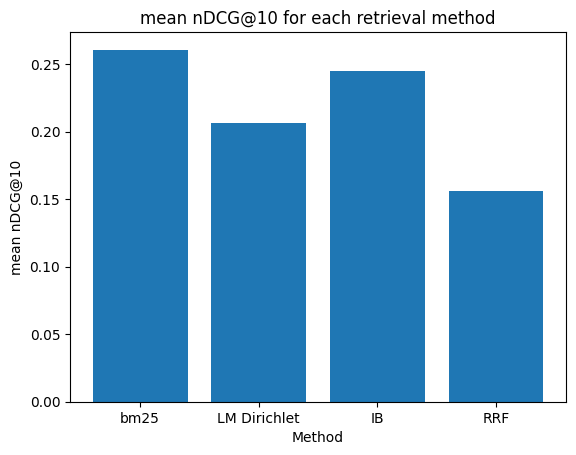

In [12]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values())
plt.xlabel('Method')
plt.ylabel('mean nDCG@10')
plt.title('mean nDCG@10 for each retrieval method')
# plt.grid()
plt.show()